# Phase 2-1 : 小規模な知識グラフを作ってみる 【手動作成】

このノートブックでは、手動でトリプルを作成し、小規模な知識グラフを構築してみる。

## 目標

- トリプル（主語, 述語, 目的語）の3つ組構造の理解
- スキーマ設計のさわりを感じる
- グラフ検索の仕組みを理解する

## 参考

- [NetworkX Document](https://networkx.org/documentation/stable/reference/index.html)


## ライブラリのインポート

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

## サンプルデータ作成

ハードコードする

In [2]:
# triples = [
#     {"subject": "LangChain", "predicate": "uses", "object": "OpenAI API"},
#     {"subject": "LangChain", "predicate": "integrates", "object": "Neo4j"},
#     {"subject": "Neo4j", "predicate": "supports", "object": "Cypher"},
#     {"subject": "RAG", "predicate": "uses", "object": "VectorStore"}, 
#     {"subject": "VectorStore", "predicate": "implemented_by", "object": "FAISS"}, 
# ]


### サンプルで使った例文（GPT5に作ってもらった）

Logistic Regression
```
Logistic Regression は二値分類によく使われるモデルです。
モデルは入力特徴量と重みの線形結合を計算し、シグモイド関数で確率を出力します。
最適化には通常、勾配降下法が利用されます。
```

Tree Algorithm
```
Decision Tree はデータを条件に従って分割しながら予測を行います。
Random Forest は多くの決定木を組み合わせたアンサンブルモデルです。
各決定木は異なるサブセットのデータを使って学習します。
```

Neural Network
```
Neural Network は複数の層とニューロンから構成されるモデルです。
入力層、隠れ層、出力層で構成されます。
重みは誤差逆伝播法で更新されます。
活性化関数には ReLU や Sigmoid が使われます。
```

SVM
```
Support Vector Machine はマージン最大化に基づく分類モデルです。
カーネルトリックを使うことで非線形分類が可能になります。
RBF カーネルは広く利用されています。
```

Transformer
```
Transformer は Attention メカニズムに基づくモデルです。
Encoder と Decoder の 2 つのブロックで構成されています。
Self-Attention は入力系列間の依存関係を捉えます。
GPT は Decoder のみを利用した Transformer です。
BERT は Encoder のみを利用したモデルです。
```


In [3]:
triples_1 = [
    {"subject": "Logistic Regression", "predicate": "used_for", "object": "Binary Classification"},
    {"subject": "Logistic Regression", "predicate": "computes", "object": "Linear Combination"},
    {"subject": "Logistic Regression", "predicate": "uses_activation", "object": "Sigmoid Function"},
    {"subject": "Gradient Descent", "predicate": "optimizes", "object": "Logistic Regression"},
]
triples_2 = [
    {"subject": "Decision Tree", "predicate": "splits_by", "object": "Conditions"},
    {"subject": "Random Forest", "predicate": "has_component", "object": "Decision Tree"},
    {"subject": "Decision Tree", "predicate": "trained_on", "object": "Data Subset"},
]
triples_3 = [
    {"subject": "Neural Network", "predicate": "has_component", "object": "Input Layer"},
    {"subject": "Neural Network", "predicate": "has_component", "object": "Hidden Layer"},
    {"subject": "Neural Network", "predicate": "has_component", "object": "Output Layer"},
    {"subject": "Neural Network", "predicate": "updated_by", "object": "Backpropagation"},
    {"subject": "Neural Network", "predicate": "uses_activation", "object": "ReLU"},
    {"subject": "Neural Network", "predicate": "uses_activation", "object": "Sigmoid"},
]
triples_4 = [
    {"subject": "Support Vector Machine", "predicate": "is_based_on", "object": "Margin Maximization"},
    {"subject": "Support Vector Machine", "predicate": "uses", "object": "Kernel Trick"},
    {"subject": "Kernel Trick", "predicate": "enables", "object": "Nonlinear Classification"},
    {"subject": "Support Vector Machine", "predicate": "uses_kernel", "object": "RBF Kernel"},
]
triples_5 = [
    {"subject": "Transformer", "predicate": "is_based_on", "object": "Attention"},
    {"subject": "Transformer", "predicate": "has_component", "object": "Encoder"},
    {"subject": "Transformer", "predicate": "has_component", "object": "Decoder"},
    {"subject": "Self-Attention", "predicate": "captures", "object": "Sequence Dependencies"},
    {"subject": "GPT", "predicate": "is_based_on", "object": "Transformer"},
    {"subject": "GPT", "predicate": "uses_component", "object": "Decoder"},
    {"subject": "BERT", "predicate": "is_based_on", "object": "Transformer"},
    {"subject": "BERT", "predicate": "uses_component", "object": "Encoder"},
]
triples = triples_1 + triples_2 + triples_3 + triples_4 + triples_5


## グラフ作成と描画

In [4]:
G = nx.DiGraph()  # 有向グラフ。知識グラフは方向性がある

for triple in triples:
    s, p, o = triple["subject"], triple["predicate"], triple["object"]
    G.add_node(s)
    G.add_node(o)
    G.add_edge(s, o, relation=p)

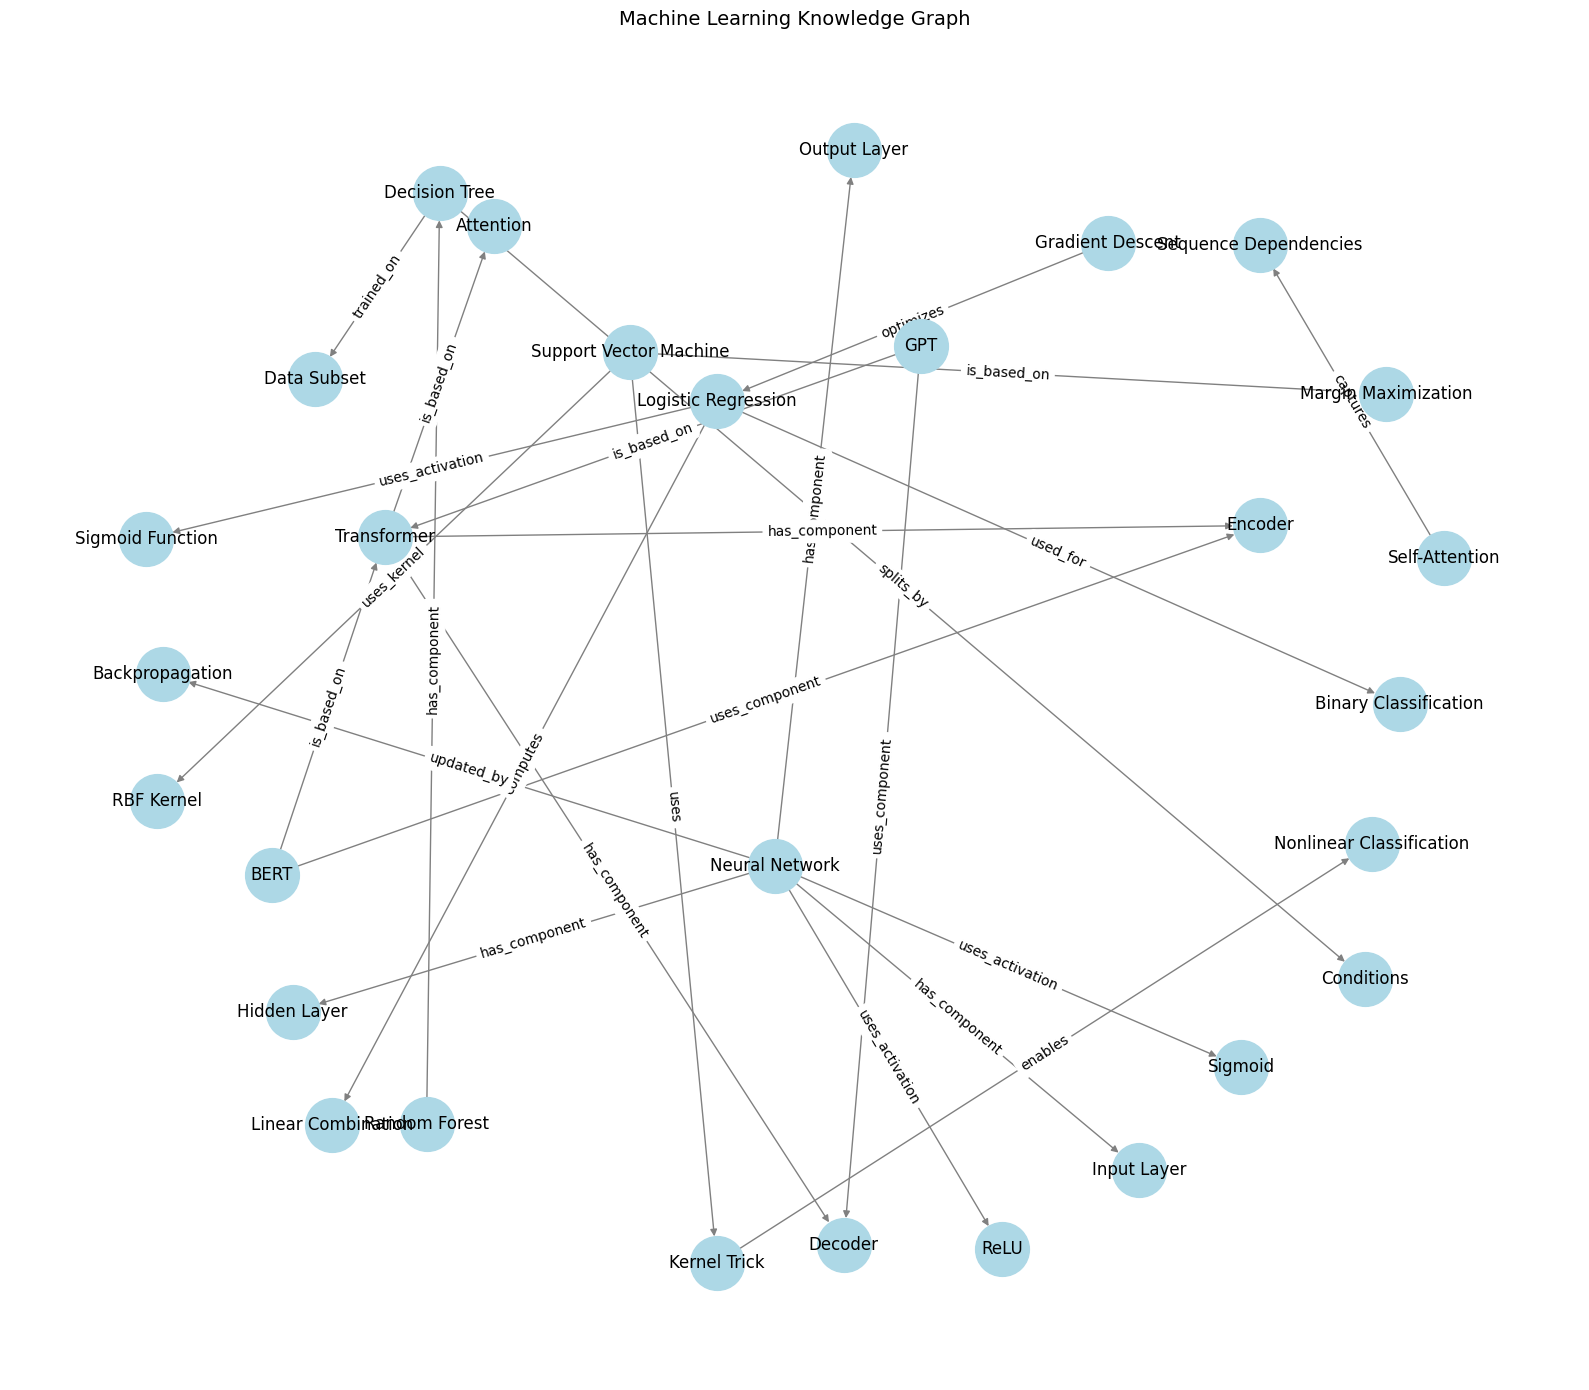

In [5]:
# レイアウト計算
pos = nx.spring_layout(G, k=1.5, iterations=50, seed=42)
edge_labels = nx.get_edge_attributes(G, "relation")

# グラフ描画
fig, ax = plt.subplots(1, 1, figsize=(16, 14))

nx.draw(
    G, pos, ax=ax, with_labels=True, node_color='lightblue',
    node_size=1500, edge_color='gray'
)
nx.draw_networkx_edge_labels(
    G, pos, edge_labels=edge_labels
)

ax.set_title('Machine Learning Knowledge Graph', fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()

## グラフの検索

networkx で作ったグラフを使ってトリプルの抽出を試す。

[メモ]

- 有向グラフなので、検索の情報伝播の方向性を意識しておかないと、思ったような検索ができない
    - 無向グラフへの変換をしてハイブリッドで検索する仕組みを考えても良いかも


### あるノードと関係する（直接繋がる）ノードを検索

- `G.successors`: 有向グラフでのエッジが伸びる先のノードを検索する
- `G.predecessors`: 有向グラフでのエッジが向かってくる元のノードを検索する

In [6]:
tgt = "Transformer"
neighbors = list(G.successors(tgt))
print(neighbors)

['Attention', 'Encoder', 'Decoder']


### 特定の関係を辿る

`out_edges` でエッジが向かう先のものを集めてきて、 `relation` 属性でフィルタする。

`in_edges` だと、エッジが向かってくるものだけを集める。

`edges` は有向グラフの場合、 `out_edges` と同じ挙動をする。

In [7]:
target = "Transformer"

components = [
    v
    for u, v, data in G.out_edges(target, data=True)
    if data.get("relation") == "has_component"
]

print(components)

['Encoder', 'Decoder']


In [8]:
target = "Attention"
list(G.in_edges(target, data=True))

[('Transformer', 'Attention', {'relation': 'is_based_on'})]

### 二つのノード間の最短経路

経路を辿る。AとBの関係を知りたいといった使い方。

有向グラフの場合は、方向に沿って辿る。

In [9]:
source = "GPT"
target = "Attention"

path = nx.shortest_path(G, source=source, target=target)
print(path)

# 経路のトリプルの取得
triples_on_path = []
for u, v in zip(path, path[1:]):
    pred = G[u][v]["relation"]
    triples_on_path.append((u, pred, v))

print(triples_on_path)

['GPT', 'Transformer', 'Attention']
[('GPT', 'is_based_on', 'Transformer'), ('Transformer', 'is_based_on', 'Attention')]


### Nホップ以内のサブグラフを取得

特定のトピックに関連する情報を抽出するという使い方

In [10]:
center = "Logistic Regression"
radius = 2  # 探索ホップ数

# 無向グラフに変換して近傍取得
ego_nodes = nx.ego_graph(G.to_undirected(), center, radius=radius).nodes()
print(ego_nodes)

['Sigmoid Function', 'Linear Combination', 'Gradient Descent', 'Logistic Regression', 'Binary Classification']


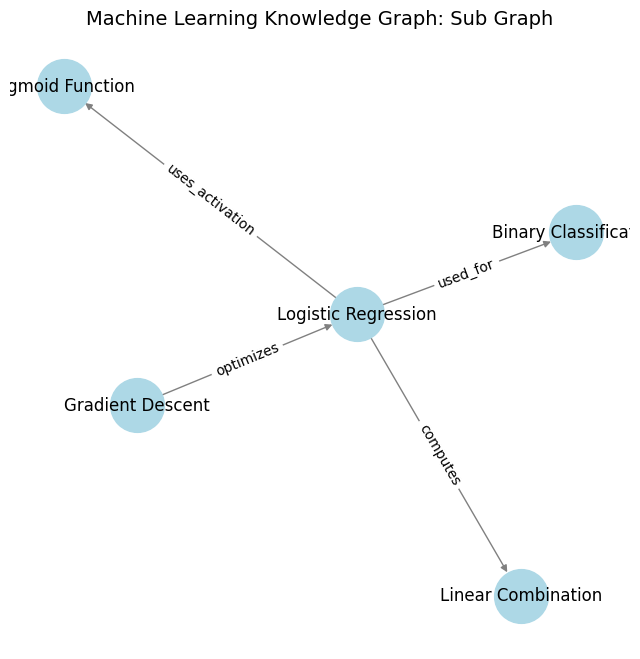

In [11]:
# サブグラフを作る
H = G.subgraph(ego_nodes).copy()

# サブグラフの描画
pos = nx.spring_layout(H, k=1, seed=42)
edge_labels = nx.get_edge_attributes(H, "relation")

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
nx.draw(
    H, pos, ax=ax, with_labels=True, node_color='lightblue',
    node_size=1500, edge_color='gray'
)
nx.draw_networkx_edge_labels(
    H, pos, edge_labels=edge_labels
)

ax.set_title('Machine Learning Knowledge Graph: Sub Graph', fontsize=14)
ax.axis('off')
plt.show()

In [12]:
sub_edges = list(H.edges(data=True))

sub_triples = [(u, v, data.get("relation")) for u, v, data in sub_edges]

for st in sub_triples:
    print(st)


('Gradient Descent', 'Logistic Regression', 'optimizes')
('Logistic Regression', 'Binary Classification', 'used_for')
('Logistic Regression', 'Linear Combination', 'computes')
('Logistic Regression', 'Sigmoid Function', 'uses_activation')


### 特定の関係性を持つトリプルの列挙

関係性の種類でのフィルタ

In [13]:
tgt_rel = "has_component"

has_component_triples = [
    (u, data["relation"], v)
    for u, v, data in G.edges(data=True)
    if data.get("relation") == tgt_rel
]

for t in has_component_triples:
    print(t)

('Random Forest', 'has_component', 'Decision Tree')
('Neural Network', 'has_component', 'Input Layer')
('Neural Network', 'has_component', 'Hidden Layer')
('Neural Network', 'has_component', 'Output Layer')
('Transformer', 'has_component', 'Encoder')
('Transformer', 'has_component', 'Decoder')


### あるノードの上流を取得

依存関係の分析に使う

In [14]:
target = "Attention"
incomings = list(G.predecessors(target))
print(incomings)

incoming_triples = [
    (u, data["relation"], v)
    for u, v, data in G.in_edges(target, data=True)
]
print(incoming_triples)

['Transformer']
[('Transformer', 'is_based_on', 'Attention')]


In [15]:
print(G.in_edges("Transformer"))   # 向かってくるエッジ(上流の検索)
print(G.edges("Transformer"))      # 向かうエッジ(下流の検索)
print(G.out_edges("Transformer"))  # 向かうエッジ(下流の検索)

[('GPT', 'Transformer'), ('BERT', 'Transformer')]
[('Transformer', 'Attention'), ('Transformer', 'Encoder'), ('Transformer', 'Decoder')]
[('Transformer', 'Attention'), ('Transformer', 'Encoder'), ('Transformer', 'Decoder')]


### 中心ノードを探す

ノードの接続数（次数）を、最大可能接続数（全ノード数 - 1）で割った値

In [16]:
centrality = nx.degree_centrality(G.to_undirected())
for node, c in sorted(centrality.items(), key=lambda x: -x[1]):
    print(node, round(c, 3))

Neural Network 0.214
Transformer 0.179
Logistic Regression 0.143
Decision Tree 0.107
Support Vector Machine 0.107
Kernel Trick 0.071
Encoder 0.071
Decoder 0.071
GPT 0.071
BERT 0.071
Binary Classification 0.036
Linear Combination 0.036
Sigmoid Function 0.036
Gradient Descent 0.036
Conditions 0.036
Random Forest 0.036
Data Subset 0.036
Input Layer 0.036
Hidden Layer 0.036
Output Layer 0.036
Backpropagation 0.036
ReLU 0.036
Sigmoid 0.036
Margin Maximization 0.036
Nonlinear Classification 0.036
RBF Kernel 0.036
Attention 0.036
Self-Attention 0.036
Sequence Dependencies 0.036
